#Grupo RM


1.   Matheus Barreto

2.   Ruy Ovidio

3.   

##Fine-Tuning de uma CNN para Classificação

Um dataset de sua escolha deverá ser coletado e preparado para realizar o fine-tuning de uma CNN. O projeto será avaliado nos seguintes aspectos:

Construção do Dataset

Data Augmentation

Uso de Modelos Pré-Treinados

Construção do Modelo Classificador

Congelamento de Camadas

Treinamento e Curvas de Desempenho

###Obs: É muito possível que a precisão dos dados não seja exata devido a remoção de uma grande quantidade de dados da base original para evitar uma longa demora na leitura

#Fine-Tuning de uma CNN para Classificação

##Construção do Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os
data_path = '/content/drive/MyDrive/Tópicos_Contemporâneos/pneumonia'
os.listdir(data_path)


['test', 'train']

##Instalação das dependências

In [3]:
!pip install torch torchvision


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

##Carregar o dataset usando ImageFolder


In [4]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Defina o caminho para as pastas de treino e teste
train_dir = '/content/drive/MyDrive/Tópicos_Contemporâneos/pneumonia/train'
test_dir = '/content/drive/MyDrive/Tópicos_Contemporâneos/pneumonia/test'

# Defina as transformações para o dataset (redimensionamento, normalização, etc.)
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Redimensionar as imagens para 224x224 (padrão ResNet)
    transforms.ToTensor(),  # Converter para tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalizar com valores padrão
])

# Carregar os datasets
train_dataset = datasets.ImageFolder(train_dir, transform=data_transforms)
test_dataset = datasets.ImageFolder(test_dir, transform=data_transforms)

# Criar os dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

# Verificar algumas imagens do dataset de treino
for images, labels in train_loader:
    print(f"Batch de imagens: {images.shape}")
    print(f"Batch de labels: {labels.shape}")
    break


Batch de imagens: torch.Size([32, 3, 224, 224])
Batch de labels: torch.Size([32])


##Data Augmentation

In [5]:
from torchvision import transforms

# Defina as transformações para o dataset com Data Augmentation
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),  # Adiciona flip horizontal aleatório
    transforms.RandomRotation(15),  # Adiciona rotação aleatória
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


##Uso de Modelos Pré-Treinados

In [6]:
import torchvision.models as models

# Carregar o modelo pré-treinado ResNet18
model = models.resnet18(pretrained=True)

# Substituir a última camada para se ajustar ao número de classes no seu dataset
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 2)  # 2 classes: Normal e Pneumonia


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 63.2MB/s]


##Uso de Modelos Pré-Treinados

In [7]:
import torch.optim as optim

# Definir a função de perda e o otimizador
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


##Construção do Modelo Classificador

In [8]:
import torch.optim as optim

# Definir a função de perda e o otimizador
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


##Congelamento de Camadas

In [9]:
for param in model.parameters():
    param.requires_grad = False

# Descongelar a última camada
for param in model.fc.parameters():
    param.requires_grad = True


##Treinamento e Curvas de Desempenho

In [10]:
# Função de treinamento
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in dataloaders['train']:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(dataloaders['train'].dataset)
        print(f'Epoch {epoch}/{num_epochs - 1}, Loss: {epoch_loss:.4f}')

    return model

# Treinar o modelo
dataloaders = {'train': train_loader, 'val': test_loader}
model = train_model(model, dataloaders, criterion, optimizer, num_epochs=10)


Epoch 0/9, Loss: 0.5634
Epoch 1/9, Loss: 0.2754
Epoch 2/9, Loss: 0.2071
Epoch 3/9, Loss: 0.1821
Epoch 4/9, Loss: 0.1883
Epoch 5/9, Loss: 0.1522
Epoch 6/9, Loss: 0.1389
Epoch 7/9, Loss: 0.1347
Epoch 8/9, Loss: 0.1341
Epoch 9/9, Loss: 0.1240


Os resultados do treinamento mostram uma tendência positiva na redução da perda, o que é um bom sinal de que o modelo está aprendendo e melhorando ao longo das épocas. Aqui estão algumas observações e próximos passos:

##Observações:

Redução da Perda: A perda está diminuindo consistentemente ao longo das épocas, o que indica que o modelo está se ajustando bem aos dados de treinamento.

Estabilização da Perda: A perda parece ter se estabilizado um pouco nas últimas épocas. Isso pode indicar que o modelo está se aproximando de um ponto de saturação.

##Avaliação no Conjunto de Teste:

In [11]:
def evaluate_model(model, dataloader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in dataloader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy: {accuracy:.2f}%')

evaluate_model(model, test_loader)


Accuracy: 83.05%


In [12]:
torch.save(model.state_dict(), 'pneumonia_cnn_model.pth')


##Plotar Curvas de Desempenho com o treinamento

Epoch 0/9, Loss: 0.1131, Accuracy: 83.05%
Epoch 1/9, Loss: 0.1120, Accuracy: 86.10%
Epoch 2/9, Loss: 0.1162, Accuracy: 84.41%
Epoch 3/9, Loss: 0.1035, Accuracy: 81.69%
Epoch 4/9, Loss: 0.1111, Accuracy: 82.71%
Epoch 5/9, Loss: 0.1084, Accuracy: 84.75%
Epoch 6/9, Loss: 0.0993, Accuracy: 81.02%
Epoch 7/9, Loss: 0.0906, Accuracy: 85.08%
Epoch 8/9, Loss: 0.1012, Accuracy: 81.36%
Epoch 9/9, Loss: 0.0981, Accuracy: 84.07%


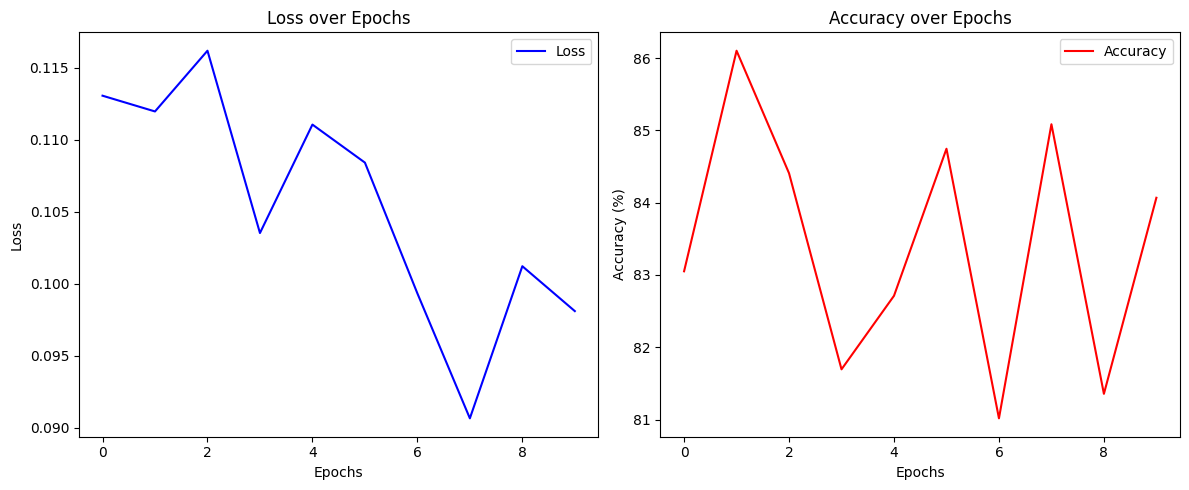

In [13]:
import matplotlib.pyplot as plt

def train_model(model, dataloaders, criterion, optimizer, num_epochs=25):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    train_loss_history = []
    val_accuracy_history = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in dataloaders['train']:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(dataloaders['train'].dataset)
        train_loss_history.append(epoch_loss)

        # Avaliação no conjunto de validação
        model.eval()
        correct = 0
        total = 0

        with torch.no_grad():
            for inputs, labels in dataloaders['val']:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        epoch_accuracy = 100 * correct / total
        val_accuracy_history.append(epoch_accuracy)

        print(f'Epoch {epoch}/{num_epochs - 1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')

    return model, train_loss_history, val_accuracy_history

# Treine o modelo e obtenha as métricas
model, train_loss_history, val_accuracy_history = train_model(model, dataloaders, criterion, optimizer, num_epochs=10)

# Plotar as curvas de desempenho
def plot_metrics(train_loss_history, val_accuracy_history):
    epochs = range(len(train_loss_history))

    plt.figure(figsize=(12, 5))

    # Plotar a perda
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss_history, 'b', label='Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plotar a acurácia
    plt.subplot(1, 2, 2)
    plt.plot(epochs, val_accuracy_history, 'r', label='Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plotar as métricas
plot_metrics(train_loss_history, val_accuracy_history)


##Avaliação Detalhada do Modelo através da matriz de confusão

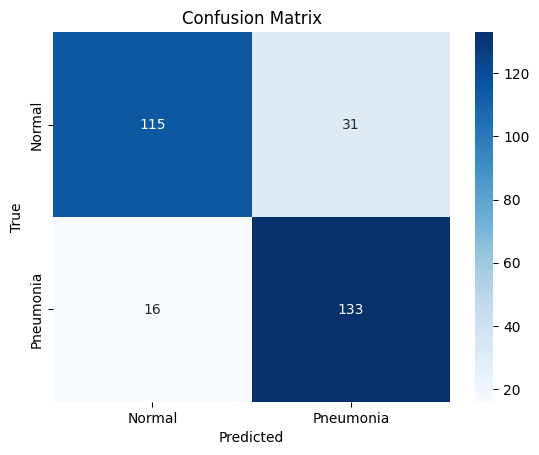

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def plot_confusion_matrix(dataloader, model):
    model.eval()
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for images, labels in dataloader:
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(test_loader, model)


##Relatório de Classificação:

In [15]:
def print_classification_report(dataloader, model):
    model.eval()
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for images, labels in dataloader:
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    print(classification_report(all_labels, all_preds, target_names=['Normal', 'Pneumonia']))

print_classification_report(test_loader, model)


              precision    recall  f1-score   support

      Normal       0.88      0.79      0.83       146
   Pneumonia       0.81      0.89      0.85       149

    accuracy                           0.84       295
   macro avg       0.84      0.84      0.84       295
weighted avg       0.84      0.84      0.84       295



##Análise de Erros

Visualizar Imagens Erradas

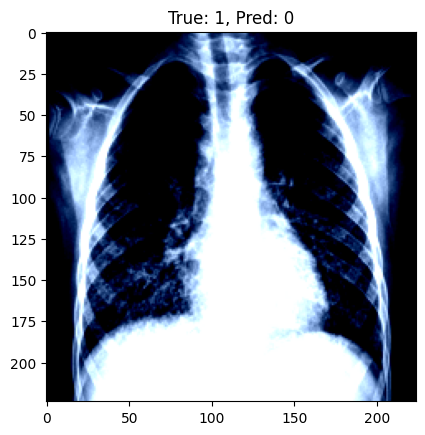

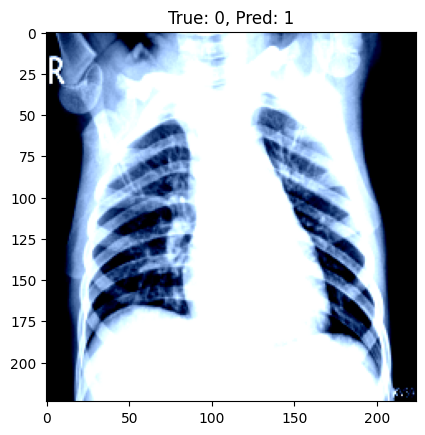

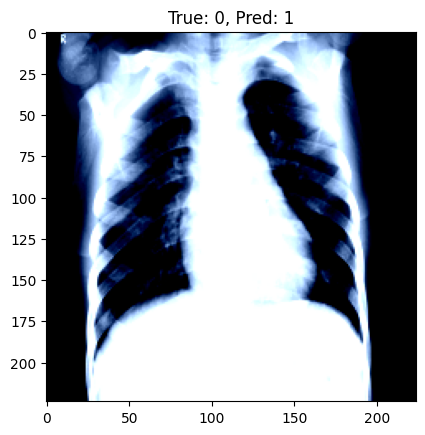

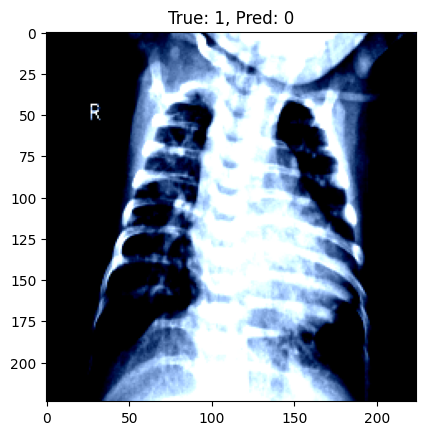

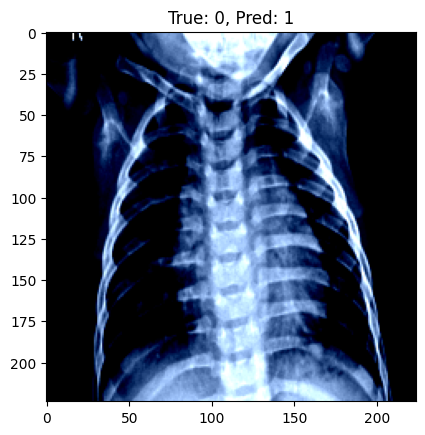

In [16]:
def show_incorrect_predictions(dataloader, model):
    model.eval()
    incorrect_imgs = []

    with torch.no_grad():
        for images, labels in dataloader:
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            for img, label, pred in zip(images, labels, preds):
                if label != pred:
                    incorrect_imgs.append((img, label, pred))

    for img, label, pred in incorrect_imgs[:5]:  # Mostrar apenas alguns exemplos
        img = img.permute(1, 2, 0).numpy()
        plt.imshow(img)
        plt.title(f'True: {label.item()}, Pred: {pred.item()}')
        plt.show()

show_incorrect_predictions(test_loader, model)


#Para finalizar, Implementação e Deploy

In [17]:
torch.save(model.state_dict(), 'pneumonia_cnn_model.pth')


##Espero que você tenha gostado professor! E espero que o projeto tenha mostrado o conhecimento da sua materia tão quanto um reflexo dos aprendizados. Obrigado!